In [162]:
%matplotlib inline

from pprint import pprint
from peer_review import *
import numpy as np
import matplotlib.pyplot as plt

In [172]:
def evaluate_vancouver(num_assignments, num_reviews, num_truths):
    # generate random groups, assignments, and reviews
    groups = { sub : [sub + x for x in ['1','2','3']] for sub in [ chr(ord('a') + z) for z in range(num_assignments)]}
    assignments = peer_assignment(groups, num_reviews)
    reviews = random_reviews(assignments)
    
    # generate a random ground truth value for all submissions
    truths = {i: random.random() for i in groups}
    truths_visible = truths.copy()
    
    # make a truths_visible dictionary for the algorithm to have access to
    truths_visible = truths.copy()
    _ = {truths_visible.popitem() for i in range(num_assignments - num_truths)}
    
    # run vancouver and omniscient vancouver
    scores, qualities = vancouver(reviews, truths_visible, 1000)
    omni_scores, omni_qualities = vancouver(reviews, truths, 1000)
    
    # generate statistics on the data
    sub_score_error = [abs(scores[submission][0] - omni_scores[submission][0]) for submission in scores]
    sub_var_error = [abs(scores[submission][1] - omni_scores[submission][1]) for submission in scores]
    grader_var_error = [abs(qualities[grader] - omni_qualities[grader]) for grader in qualities]

    return sub_score_error, sub_var_error, grader_var_error

    
def vancouver_statistics(num_assignments, num_reviews, num_truths, num_runs):
    # generate each statistic for num_runs trials
    means_acc = []
    medians_acc = []
    maxes_acc = []
    for _ in range(num_runs):
        errors = evaluate_vancouver(num_assignments, num_reviews, num_truths)
        means = [np.mean(stat) for stat in errors]
        means_acc.append(means)
        medians = [np.median(stat) for stat in errors]
        medians_acc.append(medians)
        maxes = [max(stat) for stat in errors]
        maxes_acc.append(maxes)
    
    # average the results of the statistics across the trials
    mean_average = np.mean(means_acc, axis=0)
    median_average = np.mean(medians_acc, axis=0)
    max_average = np.mean(maxes_acc, axis=0)
    
    # tidy up the output for user-friendliness
    mean_dict = {'sub_grade': mean_average[0], 'sub_var': mean_average[1], 'usr_var': mean_average[2]}
    median_dict = {'sub_grade': median_average[0], 'sub_var': median_average[1], 'usr_var': median_average[2]}
    max_dict = {'sub_grade': max_average[0], 'sub_var': max_average[1], 'usr_var': max_average[2]}
    
    return {'mean': mean_dict, 'median': median_dict, 'max': max_dict}

def print_stats(stats):
    print 'Expectation of the Error in a Given Trial', '\n'
    
    print 'Assignment Grades:'
    print 'Mean Error: ', stats['mean']['sub_grade']
    print 'Maximum Error: ', stats['max']['sub_grade']
    print 'Median Error: ', stats['median']['sub_grade'], '\n'
    
    print 'Assignment Variances:'
    print 'Mean Error: ', stats['mean']['sub_var']
    print 'Maximum Error: ', stats['max']['sub_var']
    print 'Median Error: ', stats['median']['sub_var'], '\n'
    
    print 'Grader Variances:'
    print 'Mean Error: ', stats['mean']['usr_var']
    print 'Maximum Error: ', stats['max']['usr_var']
    print 'Median Error: ', stats['median']['usr_var'], '\n', '\n'

In [173]:
print_stats(vancouver_statistics(20, 3, 5, 3))

Expectation of the Error in a Given Trial 

Assignment Grades:
Mean Error:  0.250098495953
Maximum Error:  0.663646321537
Median Error:  0.244842889118 

Assignment Variances:
Mean Error:  0.00415080163844
Maximum Error:  0.0115148676529
Median Error:  0.00312466199347 

Grader Variances:
Mean Error:  0.117881630944
Maximum Error:  0.393057439563
Median Error:  0.0900629219139 




0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


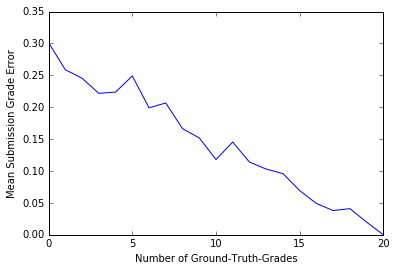

In [176]:
NUM_STUDENTS = 20
NUM_GRADES_PER_STUDENT = 3
NUM_TRIALS = 3
STEP_SIZE = 1

stats = []
for num_true_grades in range(0, NUM_STUDENTS + STEP_SIZE, STEP_SIZE):
    print(num_true_grades)
    stats.append(vancouver_statistics(NUM_STUDENTS, NUM_GRADES_PER_STUDENT, num_true_grades, NUM_TRIALS)['mean']['sub_grade'])
    
plt.plot(range(0, NUM_STUDENTS + STEP_SIZE, STEP_SIZE), stats)
plt.xlabel('Number of Ground-Truth-Grades')
plt.ylabel('Mean Submission Grade Error')
plt.show()